In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv(path+'data/driver_standings.csv')
merged = pd.read_csv(path+'data/merged.csv')

In [3]:
### Removing weather values as they are not accurate enough for analysis

merged = merged.drop(['warm', 'cold', 'dry', 'wet', 'cloudy'], axis=1)
merged.head()

,season,round,circuit_id,date,driver,date_of_birth,nationality,constructor,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qual_time,q_delta
0,2020,1,red_bull_ring,2020-07-05,bottas,1989-08-28,Finnish,mercedes,1,1,25,1,1,37,1,1,62.939,0.000
1,2020,1,red_bull_ring,2020-07-05,leclerc,1997-10-16,Monegasque,ferrari,7,2,18,0,2,19,0,3,63.923,0.984
2,2020,1,red_bull_ring,2020-07-05,norris,1999-11-13,British,mclaren,3,3,16,0,3,26,0,2,63.626,0.687
3,2020,1,red_bull_ring,2020-07-05,hamilton,1985-01-07,British,mercedes,5,4,12,0,4,37,1,1,62.951,0.012
4,2020,1,red_bull_ring,2020-07-05,sainz,1994-09-01,Spanish,mclaren,8,5,10,0,5,26,0,2,63.971,1.032


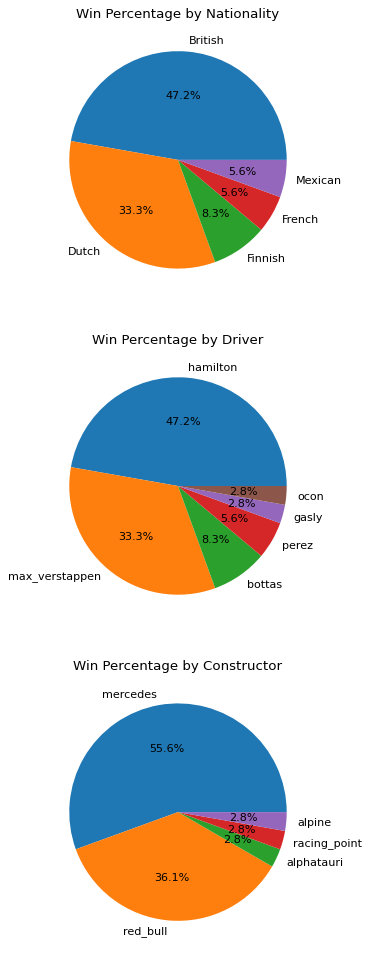

In [5]:
winners = merged.query('podium == 1')

nationalities = winners.nationality.value_counts()
drivers = winners.driver.value_counts()
constructors = winners.constructor.value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(3, dpi=80)
fig.set_size_inches(10, 15)

ax1.set_title('Win Percentage by Nationality')
ax1.pie(nationalities.values, labels=nationalities.index,autopct='%1.1f%%')

ax2.set_title('Win Percentage by Driver')
ax2.pie(drivers.values, labels=drivers.index,autopct='%1.1f%%')

ax3.set_title('Win Percentage by Constructor')
ax3.pie(constructors.values, labels=constructors.index,autopct='%1.1f%%')
plt.show()

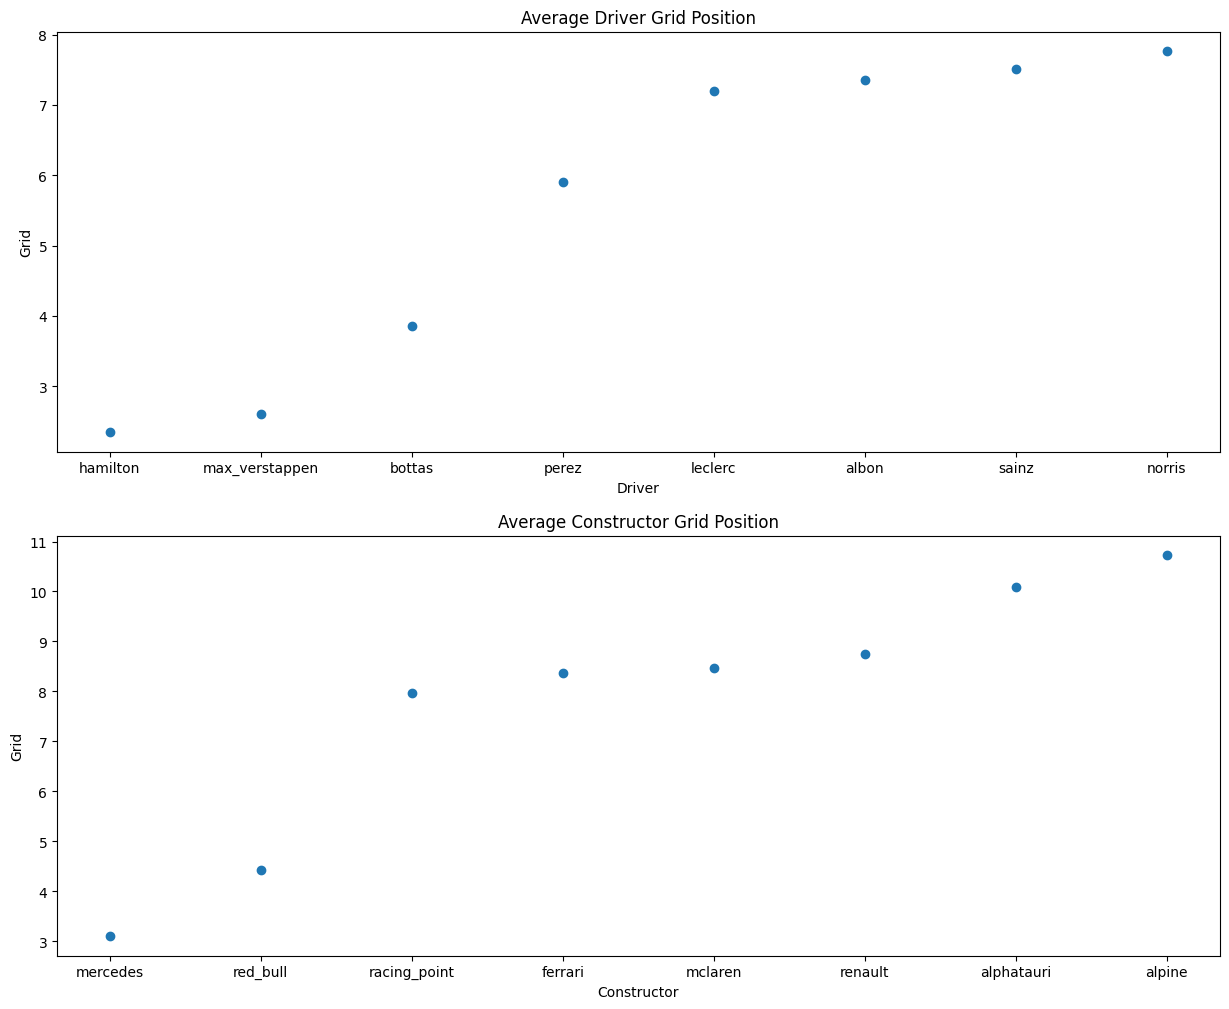

In [65]:
avg_driver_grid = merged.groupby(
    'driver'
    ).agg({
    'grid': mean
    }
).reset_index().sort_values('grid')

avg_constructor_grid = merged.groupby(
    'constructor'
    ).agg({
    'grid': mean
    }
).reset_index().sort_values('grid')

driver_values = avg_driver_grid[:8]
constructor_values = avg_constructor_grid[:8]

fig, (ax1, ax2) = plt.subplots(2, dpi=100)
fig.set_size_inches(15, 12)

ax1.set_title('Average Driver Grid Position')
ax1.set_xlabel('Driver')
ax1.set_ylabel('Grid')
ax1.scatter(driver_values.driver, driver_values.grid)

ax2.set_title('Average Constructor Grid Position')
ax2.set_xlabel('Constructor')
ax2.set_ylabel('Grid')
ax2.scatter(constructor_values.constructor, constructor_values.grid)
plt.show()